In [39]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings 

In [40]:
# Suppress warnings
warnings.filterwarnings("ignore")

# Reading data from a CSV file
customer = pd.read_csv('customer_segmentation.csv')
customer

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [41]:
customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [42]:
customer.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [43]:
customer.dropna()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [44]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [45]:
# Function to calculate Significant moments of Tournaments
def Significant_moments(customer):
    # Convert 'Customer ID' column to numeric
    customer['CustomerID'] = pd.to_numeric(customer['CustomerID'], errors='coerce')
    customer.dropna(subset=['CustomerID'], inplace=True)

    # Calculate moments
    moments = {
        'Mean': customer['CustomerID'].mean(),
        'Median': customer['CustomerID'].median(),
        'Standard Deviation': customer['CustomerID'].std(),
        'Skewness': stats.skew(customer['CustomerID']),
        'Kurtosis': stats.kurtosis(customer['CustomerID'])
    }

    return moments

# Function to generate correlation matrix
def generate_correlation_matrix(customer):
    # Select numeric columns for correlation analysis
    numeric_columns = customer.select_dtypes(include=np.number).columns

    # Compute correlation matrix
    correlation_matrix = customer[numeric_columns].corr()

    return correlation_matrix

# Function to get basic descriptive statistics
def basic_describe(customer):
    return customer.describe()

# Assuming 'data' is your DataFrame containing the IMDb data
moments = Significant_moments(customer)
correlation_matrix = generate_correlation_matrix(customer)
descriptive_stats = basic_describe(customer)

# Print major moments
print("Significant Moments:")
for moment, value in moments.items():
    print(f"{moment}: {value}")

# Print correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Print descriptive statistics
print("\nDescriptive Statistics:")
print(descriptive_stats)    

Significant Moments:
Mean: 100.5
Median: 100.5
Standard Deviation: 57.879184513951124
Skewness: 0.0
Kurtosis: -1.2000600015000373

Correlation Matrix:
                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  

Descriptive Statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.87918

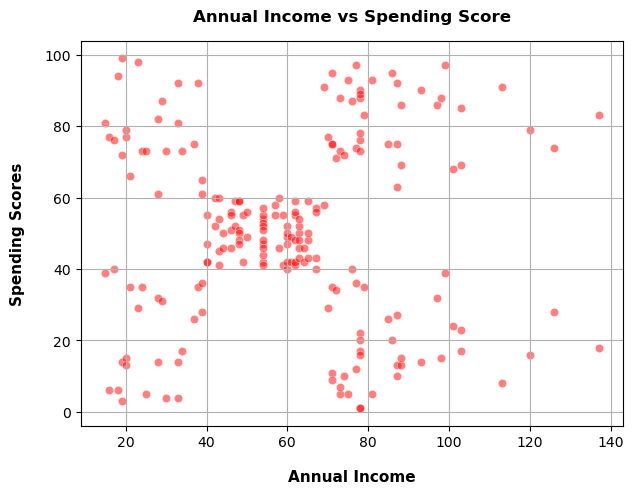

In [46]:
def scatter_plot_Annual_Income_vs_Spending_Score(customer):
    """
    Create a scatter plot comparing the number of Tournaments and Points.

    Parameters:
    customer (DataFrame): The DataFrame containing the data.

    Returns:
    None
    """
    # Figure Size
    plt.figure(figsize=(7, 5)) 

    # Scatter plot with seaborn
    sns.scatterplot(x= customer['Annual Income (k$)'], y= customer['Spending Score (1-100)'], color ='red', alpha=0.5)

    # Adding labels and title with appropriate fontsize
    plt.xlabel('Annual Income', fontsize=11,fontweight='bold', labelpad = 14)
    plt.ylabel('Spending Scores', fontsize=11,fontweight='bold', labelpad = 14)
    plt.title('Annual Income vs Spending Score', fontsize=12,fontweight='bold', pad = 14)

    # Add grid lines for better readability
    plt.grid(True)
 
    # Display the plot
    plt.show() 
    
#calling the function
scatter_plot_Annual_Income_vs_Spending_Score(customer)

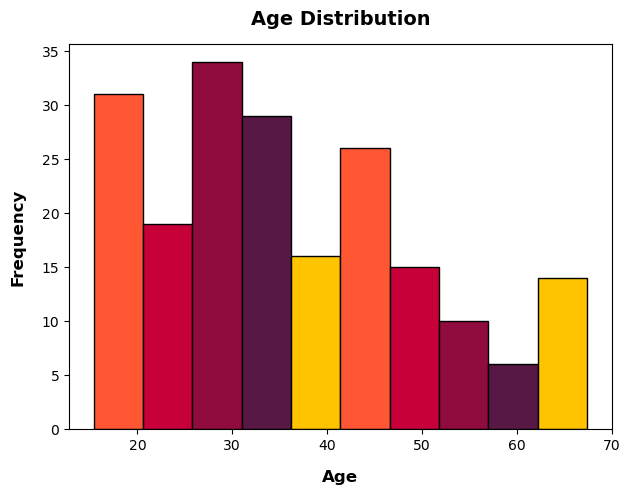

In [47]:
def plot_age_histogram(customer):
    """
    Plots a histogram of the ages of customers.

    Parameters:
        customer (DataFrame): DataFrame containing customer data with an 'Age' column.

    Returns:
        None
    """
    # Defining different colors for each bin
    colors = ['#FF5733', '#C70039', '#900C3F', '#581845', '#FFC300', '#FF5733', '#C70039', '#900C3F', '#581845', '#FFC300']
    
    # Calculating histogram
    counts, bins = np.histogram(customer['Age'])

    # Plot histogram
    plt.figure(figsize=(7, 5))
    for i in range(len(bins) - 1):
        plt.bar(bins[i], counts[i], width=bins[i+1] - bins[i], color=colors[i], edgecolor='black')
    plt.title('Age Distribution', fontsize=14, fontweight='bold', pad = 14)
    plt.xlabel('Age', fontsize=12, fontweight='bold',labelpad = 12)
    plt.ylabel('Frequency', fontsize=12, fontweight='bold',labelpad = 12)
    plt.show()

# Calling the function
plot_age_histogram(customer)

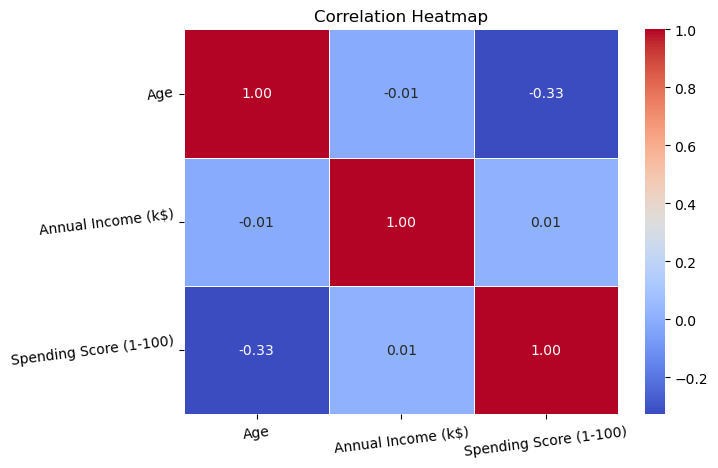

In [48]:
def plot_heatmap(customer, columns):
    """
    Plot a heatmap showing the correlation matrix of selected columns.

    Parameters:
        customer (DataFrame): The DataFrame containing the data.
        columns (list): A list of column names to be included in the heatmap.

    Returns:
        None
    """
    # Calculating the correlation matrix
    correlation_matrix = customer[columns].corr()

    # Plotting the heatmap
    plt.figure(figsize=(7, 5))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, xticklabels=columns, yticklabels=columns, fmt=".2f", annot_kws={"size": 10})
    plt.xticks(rotation=7)  # Rotate x-axis labels by 45 degrees
    plt.yticks(rotation=7)  # Rotate y-axis labels by 45 degrees
    plt.title('Correlation Heatmap')
    plt.show()

# Define the relevant columns
selected_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Call the function to plot the heatmap
plot_heatmap(customer, selected_columns)


Silhouette Score: 0.5767432204501248


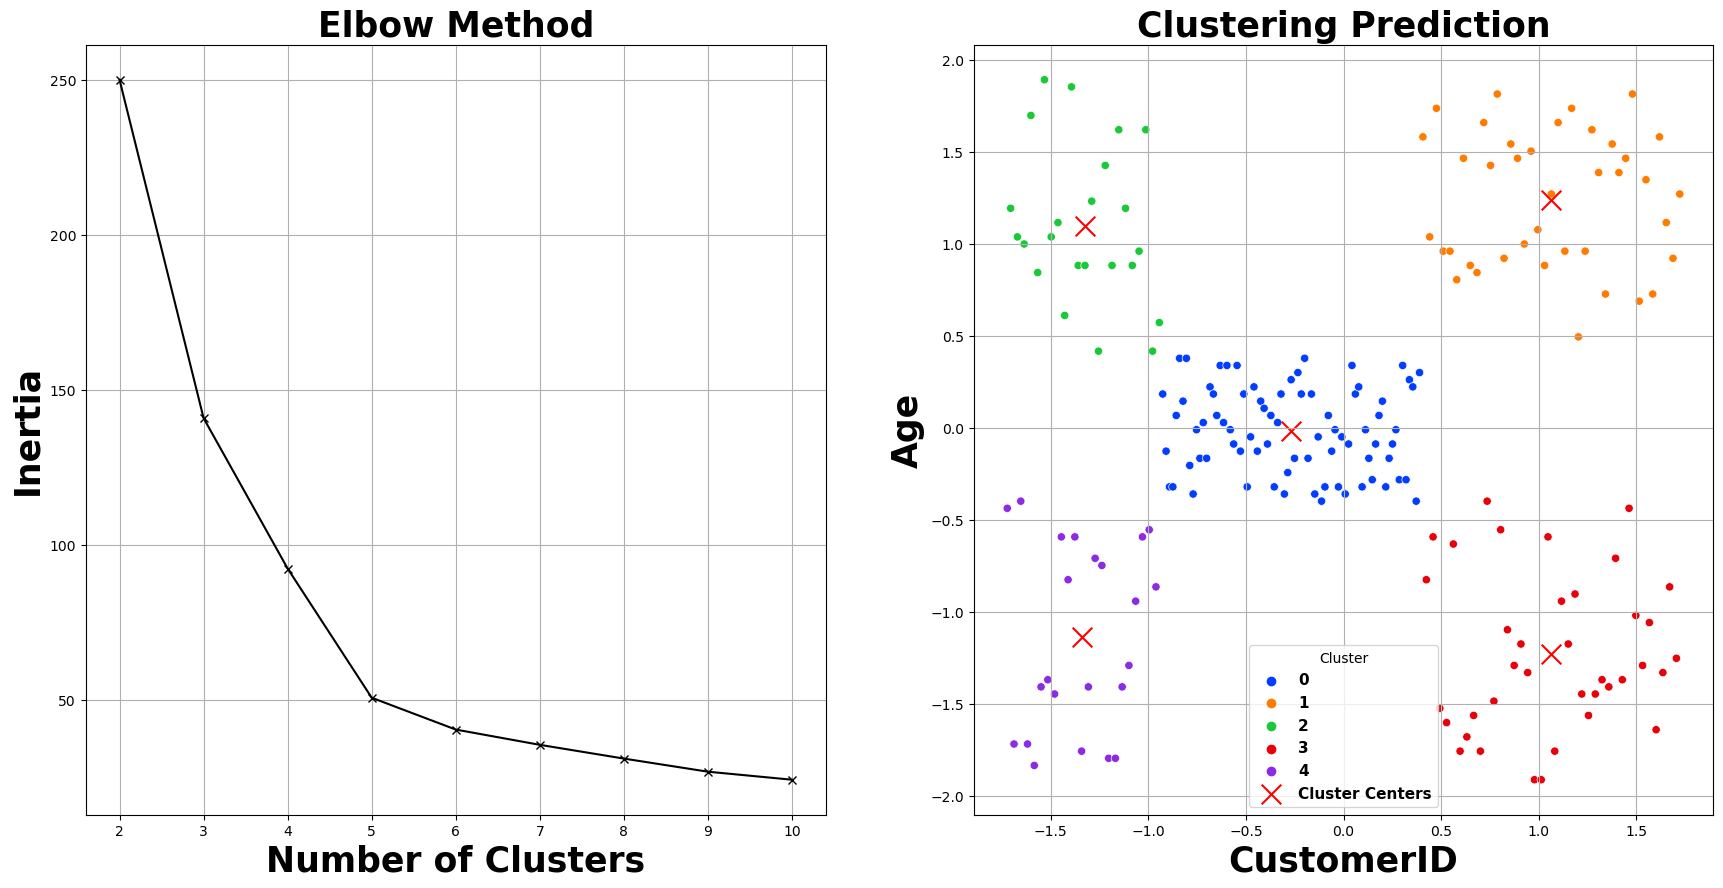

In [49]:
def kmeans_clustering(customer):
    """
    Perform KMeans clustering on the selected features and plot the clusters along with their centroids.

    Parameters:
        customer (DataFrame): The DataFrame containing the data.

    Returns:
        None
    """
    # Step 1: Preprocess the data
    def preprocess_data(customer):
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(customer)
        return scaled_data, scaler

    # Step 2: Perform clustering
    def perform_clustering(customer, n_clusters):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        labels = kmeans.fit_predict(customer)
        centroids = kmeans.cluster_centers_
        return labels, centroids

    # Step 3: Calculate silhouette score
    def calculate_silhouette_score(customer, labels):
        silhouette_avg = silhouette_score(customer, labels)
        print("Silhouette Score:", silhouette_avg)

    # Step 4: Elbow method for determining optimal number of clusters
    def elbow_method(customer):
        inertia = []
        for n_clusters in range(2, 11):
            kmeans = KMeans(n_clusters=n_clusters, random_state=42)
            kmeans.fit(customer)
            inertia.append(kmeans.inertia_)

        # Elbow method plot
        plt.figure(figsize=(21, 10))
        plt.subplot(1, 2, 1)
        plt.plot(range(2, 11), inertia, marker='x', color='black')
        plt.xlabel('Number of Clusters',fontsize='25', fontweight='bold')
        plt.ylabel('Inertia', fontsize='25', fontweight='bold')
        plt.title('Elbow Method',fontsize='25', fontweight='bold')
        plt.grid(True)

    # Step 5: Visualize clusters
    def visualize_clusters(customer, labels, centroids):
        # Clustering prediction plot
        plt.subplot(1, 2, 2)
        sns.scatterplot(x=customer[:, 0], y=customer[:, 1], hue=labels, palette='bright')
        plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='red', label='Cluster Centers')
        plt.title('Clustering Prediction',fontsize='25', fontweight='bold')
        plt.xlabel('CustomerID', fontsize='25',fontweight='bold')
        plt.ylabel('Age',fontsize='25', fontweight='bold')
        plt.legend(title='Cluster', fontsize = '11')
        plt.grid(True)
        
        # Make the legend labels bold
        for label in plt.gca().get_legend().get_texts():
            label.set_fontweight('bold')

    # Main function to execute all steps
    def main():
        # Step 1: Preprocess the data
        scaled_data, scaler = preprocess_data(customer[features])
        
        # Choose optimal number of clusters
        n_clusters = 5
        
        # Step 4: Elbow method
        elbow_method(scaled_data)
        
        # Step 2: Perform clustering
        labels, centroids = perform_clustering(scaled_data, n_clusters)
        
        # Step 3: Calculate silhouette score
        calculate_silhouette_score(scaled_data, labels)
        
        # Step 5: Visualize clusters
        visualize_clusters(scaled_data, labels, centroids)

    # Execute the main function
    main()

# Calling the function 
customer = pd.read_csv("customer_segmentation.csv") 
features = ['CustomerID', 'Spending Score (1-100)']
kmeans_clustering(customer)


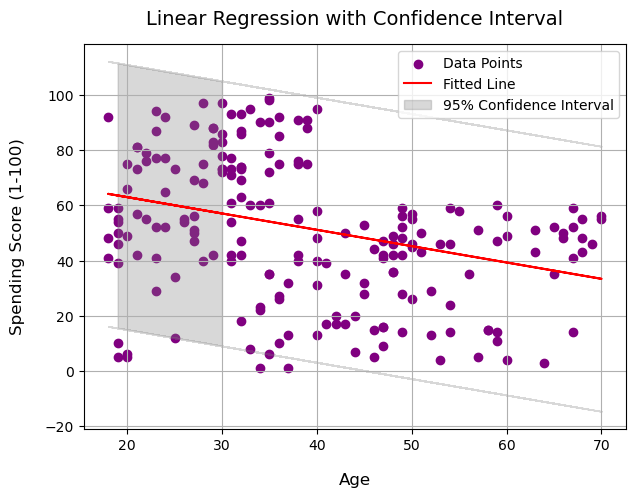

In [50]:
def linear_regression_confidence_interval(customer):
    """
    Perform linear regression on the provided data and plot the fitted line along with the confidence interval.

    Parameters:
    customer (DataFrame): The DataFrame containing the data.

    Returns:
    None
    """
    # Generating data for line fitting
    X_line = np.array(customer['Age']).reshape(-1, 1)  # Using 'Age' column for X
    y_line = np.array(customer['Spending Score (1-100)'])

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_line, y_line, test_size=0.2, random_state=42)

    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # predictions
    y_pred = model.predict(X_line)

    # Calculating residuals and standard deviation of residuals
    residuals = y_line - y_pred
    std_dev = np.std(residuals)

    # Calculating the confidence interval (95% confidence level)
    alpha = 0.05
    t_value = stats.t.ppf(1 - alpha / 2, len(X_line) - 2)  # t-value for two-tailed test
    margin_of_error = t_value * std_dev

    # Plot the data points, the fitted line, and the confidence interval
    plt.figure(figsize=(7, 5))
    plt.scatter(X_line, y_line, color='Purple', label='Data Points')
    plt.plot(X_line, y_pred, color='red', label='Fitted Line')
    plt.fill_between(X_line.flatten(), y_pred - margin_of_error, y_pred + margin_of_error, color='gray', alpha=0.3, label='95% Confidence Interval')
    plt.title('Linear Regression with Confidence Interval', pad=14, fontsize=14)
    plt.xlabel('Age', labelpad=14, fontsize=12) 
    plt.ylabel('Spending Score (1-100)', labelpad=14, fontsize=12)  
    plt.legend()
    plt.grid(True)
    plt.show()

# Calling the function 
customer = pd.read_csv("customer_segmentation.csv") 
linear_regression_confidence_interval(customer)